In [1]:
import os
import ants
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def check_orientation_robust(image_path):
    """
    Robustly checks and visualizes the orientation of a medical image.
    
    Args:
        image_path (str): Path to the NIfTI file.
    """
    if not os.path.exists(image_path):
        print(f"Error: File not found at {image_path}")
        return

    print(f"--- Checking Image: {os.path.basename(image_path)} ---")
    
    # 1. Load with ANTsPy
    try:
        img_ants = ants.image_read(image_path)
        
        # Get Orientation String (e.g., 'LPI', 'RAS')
        # ANTsPy calculates this from the direction cosine matrix
        orientation = ants.get_orientation(img_ants)
        
        print(f"\n")
        print(f"Detected Orientation: {orientation}")
        print(f"Dimensions:           {img_ants.shape}")
        print(f"Spacing:              {img_ants.spacing}")
        print(f"Origin:               {img_ants.origin}")
        print(f"Direction Matrix:\n{img_ants.direction}")
        
        # 2. Visual Check (Orthogonal View)
        # This plots the image with labels (L/R, A/P, S/I) based on the header.
        # IF the header is wrong, these labels will look wrong relative to the anatomy.
        print(f"\n[Visual Verification]")
        print("Generating orthogonal plot... (Check if anatomy matches labels)")
        
        ants.plot_ortho(
            img_ants, 
            orient_labels=True,   # Shows L, R, A, P, S, I labels
            flat=True,            # Plots side-by-side
            title=f"Orientation: {orientation}"
        )
        
        # 3. Optional: Cross-check with Nibabel (if installed)
        # This detects conflicts between qform and sform codes in NIfTI
        try:
            import nibabel as nib
            nii = nib.load(image_path)
            print(f"\n[Nibabel Cross-Check]")
            print(f"Affine Orientation:   {nib.aff2axcodes(nii.affine)}")
            
            # Check for qform/sform mismatch code
            qform_code = nii.header.get_qform_converter()
            sform_code = nii.header.get_sform_converter()
            # Note: Just checking existence here, deep analysis requires comparing the matrices
            print(f"Has QForm:            {nii.header['qform_code'] > 0}")
            print(f"Has SForm:            {nii.header['sform_code'] > 0}")
            
        except ImportError:
            print("\n[Nibabel Cross-Check] Skipped (nibabel not installed)")
            
    except Exception as e:
        print(f"Error processing image: {e}")

In [6]:
raw_image_path = "G:\FYP\Codes\Data Processing\mri_sr_pipeline\data\\raw\subject-01.nii.gz"
raw_image = ants.image_read(raw_image_path)

In [7]:
print(raw_image.shape)

(256, 320, 320)


In [8]:
print(raw_image.spacing)

(0.699999988079071, 0.699999988079071, 0.699999988079071)


In [9]:

print(raw_image.origin)

(-87.48723602294922, 61.475852966308594, -115.04459381103516)


In [10]:

print(raw_image.direction)

[[ 0.9998618   0.00588524  0.01554814]
 [ 0.00464524 -0.996894    0.07861784]
 [-0.01596254  0.07853475  0.99678357]]


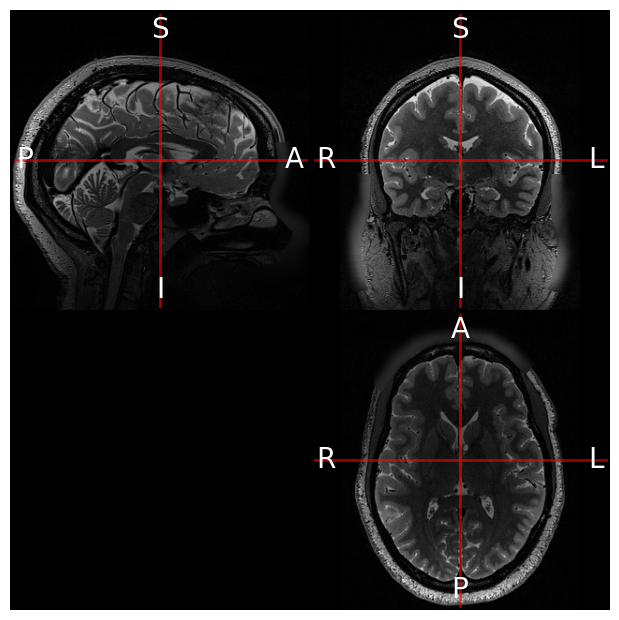

In [12]:
# To standardise a weirdly oriented image:
img_standard = ants.reorient_image2(raw_image, orientation='RAI') # or 'LPI'
ants.plot_ortho(img_standard, orient_labels=True)

In [14]:
template_path = "G:\FYP\Codes\Data Processing\mri_sr_pipeline\data\\templates\mni152_template.nii.gz"
template = ants.image_read(template_path)

<>:1: DeprecationWarning: invalid escape sequence '\F'
<>:1: DeprecationWarning: invalid escape sequence '\F'
C:\Users\USER\AppData\Local\Temp\ipykernel_18168\3701914618.py:1: DeprecationWarning: invalid escape sequence '\F'
  template_path = "G:\FYP\Codes\Data Processing\mri_sr_pipeline\data\\templates\mni152_template.nii.gz"


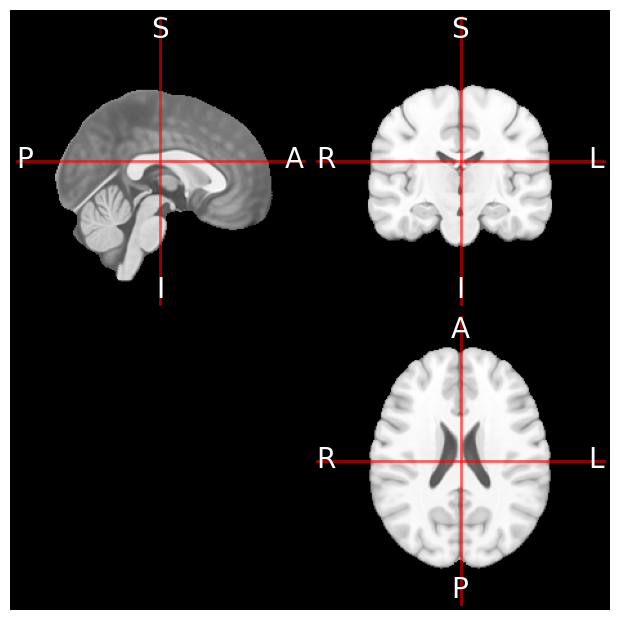

In [15]:
img_standard = ants.reorient_image2(template, orientation='RAI') # or 'LPI'
ants.plot_ortho(img_standard, orient_labels=True)

In [16]:
template.shape

(197, 233, 189)